In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/dataset_heart.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
df.shape

(270, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Heart Disease'] = le.fit_transform(df['Heart Disease'])
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [ ]:
df['Heart Disease'].value_counts()

0    150
1    120
Name: Heart Disease, dtype: int64

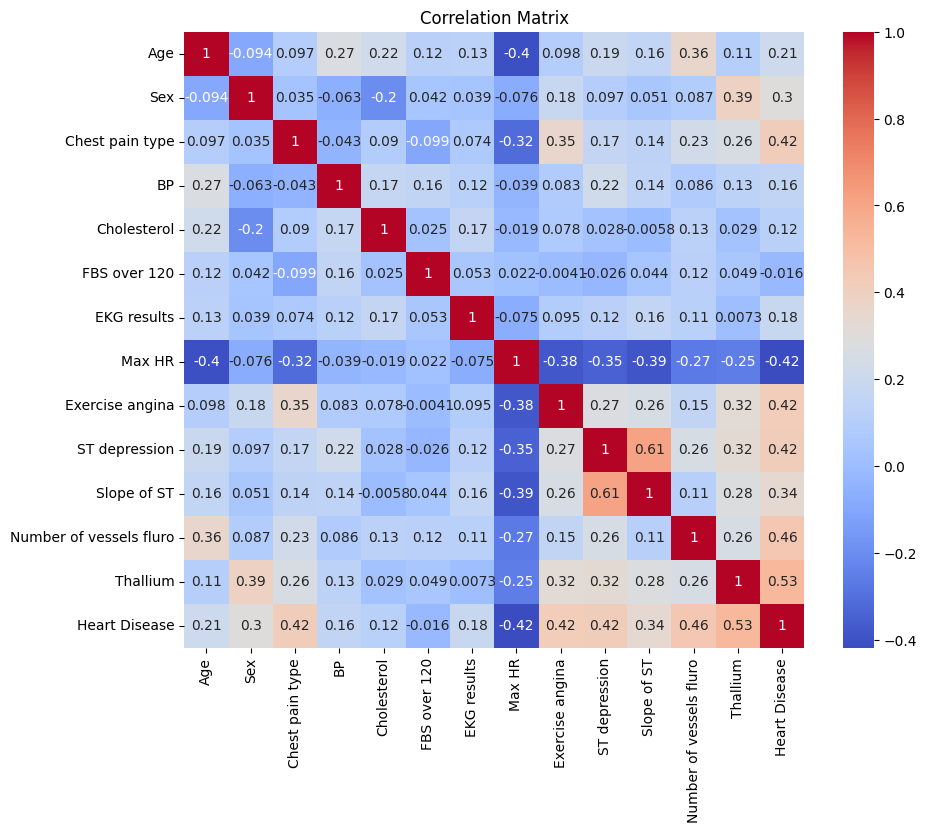

In [ ]:
plt.figure(figsize=(10,8))
# Create a heatmap using seaborn
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Set the plot title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

In [ ]:
X=df.drop(columns=['Heart Disease'])
y=df['Heart Disease']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rf_pred=rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:",accuracy_score(y_test,rf_pred))

Accuracy: 0.8518518518518519


In [ ]:
confusion_matrix(y_test,rf_pred)

array([[30,  3],
       [ 5, 16]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.84      0.76      0.80        21

    accuracy                           0.85        54
   macro avg       0.85      0.84      0.84        54
weighted avg       0.85      0.85      0.85        54



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,rf_pred,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,rf_pred))

Mean squared error: 0.3849001794597505
Mean absolute error: 0.14814814814814814


## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
ada_pred=ada.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy:",accuracy_score(y_test,ada_pred))

Accuracy: 0.7962962962962963


In [ ]:
confusion_matrix(y_test,ada_pred)

array([[28,  5],
       [ 6, 15]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ada_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.75      0.71      0.73        21

    accuracy                           0.80        54
   macro avg       0.79      0.78      0.78        54
weighted avg       0.79      0.80      0.80        54



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,ada_pred,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,ada_pred))

Mean squared error: 0.45133546692422
Mean absolute error: 0.2037037037037037


## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
gb_pred=gb.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,gb_pred)

0.7592592592592593

In [ ]:
confusion_matrix(y_test,gb_pred)

array([[28,  5],
       [ 8, 13]])

In [ ]:
gb_pred=gb.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,gb_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        33
           1       0.72      0.62      0.67        21

    accuracy                           0.76        54
   macro avg       0.75      0.73      0.74        54
weighted avg       0.76      0.76      0.76        54



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,gb_pred,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,gb_pred))

Mean squared error: 0.49065338146265813
Mean absolute error: 0.24074074074074073


## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier




# Create base classifiers
lr_classifier = LogisticRegression(max_iter=10000)
svm_classifier = SVC(probability=True)  # Set probability=True for soft voting
knn_classifier = KNeighborsClassifier(n_neighbors=15)
nb_classifier = GaussianNB()
dt_classifier = DecisionTreeClassifier()

# Create a Bagging Classifier with the base classifiers
bagging_lr = BaggingClassifier(estimator=lr_classifier, n_estimators=10, random_state=42)
bagging_svm = BaggingClassifier(estimator=svm_classifier, n_estimators=10, random_state=42)
bagging_knn = BaggingClassifier(estimator=knn_classifier, n_estimators=10, random_state=42)
bagging_nb = BaggingClassifier(estimator=nb_classifier, n_estimators=10, random_state=42)
bagging_dt = BaggingClassifier(estimator=dt_classifier, n_estimators=10, random_state=42)

# Fit the Bagging Classifiers on the training data
bagging_lr.fit(X_train, y_train)
bagging_svm.fit(X_train, y_train)
bagging_knn.fit(X_train, y_train)
bagging_nb.fit(X_train, y_train)
bagging_dt.fit(X_train, y_train)

# Make predictions using the Bagging Classifiers
y_pred_lr = bagging_lr.predict(X_test)
y_pred_svm = bagging_svm.predict(X_test)
y_pred_knn = bagging_knn.predict(X_test)
y_pred_nb = bagging_nb.predict(X_test)
y_pred_dt = bagging_dt.predict(X_test)

# Calculate and print accuracy scores for each Bagging Classifier

print("Bagging Logistic Regression Score:",accuracy_score(y_test, y_pred_lr))
print("Bagging SVM Score:", accuracy_score(y_test, y_pred_svm))
print("Bagging K-Nearest Neighbors Score:", accuracy_score(y_test, y_pred_knn))
print("Bagging Naive Bayes Score:", accuracy_score(y_test, y_pred_nb))
print("Bagging Decision Tree Score:", accuracy_score(y_test, y_pred_dt))

lr=accuracy_score(y_test, y_pred_lr)
svm= accuracy_score(y_test, y_pred_svm)
knn=accuracy_score(y_test, y_pred_knn)
nb=accuracy_score(y_test, y_pred_nb)
dt=accuracy_score(y_test, y_pred_dt)

print("Maximum Accuracy:",max(lr,svm,knn,nb,dt))


Bagging Logistic Regression Score: 0.8888888888888888
Bagging SVM Score: 0.6666666666666666
Bagging K-Nearest Neighbors Score: 0.7222222222222222
Bagging Naive Bayes Score: 0.9074074074074074
Bagging Decision Tree Score: 0.7962962962962963
Maximum Accuracy: 0.9074074074074074


In [ ]:
confusion_matrix(y_test,y_pred_nb)

array([[32,  1],
       [ 4, 17]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,y_pred_nb,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,y_pred_nb))

Mean squared error: 0.3042903097250923
Mean absolute error: 0.09259259259259259


## Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Define the base classifiers
base_classifiers = [
    ('lr', LogisticRegression(max_iter=10000)),
    ('svm', SVC(probability=True)),
    ('knn', KNeighborsClassifier(n_neighbors=15)),
    ('nb', GaussianNB()),
    ('dt', DecisionTreeClassifier())

]

# Define the meta-classifier (you can choose any classifier)
#meta_classifier = GaussianNB()

# Create the stacking classifier
stacking_classifier_lr = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(max_iter=10000))
stacking_classifier_svm = StackingClassifier(estimators=base_classifiers, final_estimator=SVC(probability=True))
stacking_classifier_knn = StackingClassifier(estimators=base_classifiers, final_estimator=KNeighborsClassifier(n_neighbors=15))
stacking_classifier_nb = StackingClassifier(estimators=base_classifiers, final_estimator=GaussianNB())
stacking_classifier_dt = StackingClassifier(estimators=base_classifiers, final_estimator=DecisionTreeClassifier())

# Train the stacking classifier on the training data
stacking_classifier_lr.fit(X_train, y_train)
stacking_classifier_svm.fit(X_train, y_train)
stacking_classifier_knn.fit(X_train, y_train)
stacking_classifier_nb.fit(X_train, y_train)
stacking_classifier_dt.fit(X_train, y_train)

# Make predictions on the test data
#stacking_predictions = stacking_classifier.predict(X_test)
y_pred_lr = stacking_classifier_lr.predict(X_test)
y_pred_svm = stacking_classifier_svm.predict(X_test)
y_pred_knn = stacking_classifier_knn.predict(X_test)
y_pred_nb = stacking_classifier_nb.predict(X_test)
y_pred_dt = stacking_classifier_dt.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
print("Stacking Logistic Regression Score:", accuracy_score(y_test, y_pred_lr))
print("Stacking SVM Score:", accuracy_score(y_test, y_pred_svm))
print("Stacking K-Nearest Neighbors Score:", accuracy_score(y_test, y_pred_knn))
print("Stacking Naive Bayes Score:", accuracy_score(y_test, y_pred_nb))
print("Stacking Decision Tree Score:", accuracy_score(y_test, y_pred_dt))
lr=accuracy_score(y_test, y_pred_lr)
svm= accuracy_score(y_test, y_pred_svm)
knn=accuracy_score(y_test, y_pred_knn)
nb=accuracy_score(y_test, y_pred_nb)
dt=accuracy_score(y_test, y_pred_dt)

print("Maximum Accuracy:",max(lr,svm,knn,nb,dt))

Stacking Logistic Regression Score: 0.9074074074074074
Stacking SVM Score: 0.9074074074074074
Stacking K-Nearest Neighbors Score: 0.9074074074074074
Stacking Naive Bayes Score: 0.9074074074074074
Stacking Decision Tree Score: 0.7407407407407407
Maximum Accuracy: 0.9074074074074074


In [ ]:
confusion_matrix(y_test,y_pred_lr)

array([[32,  1],
       [ 4, 17]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test,y_pred_lr,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test,y_pred_lr))

Mean squared error: 0.3042903097250923
Mean absolute error: 0.09259259259259259


##Deep Learning

In [ ]:
from sklearn.neural_network import MLPClassifier
dl=MLPClassifier()
dl.fit(X_train,y_train)

MLPClassifier()

In [ ]:
dl_pred=dl.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test, dl_pred)

0.6481481481481481

In [ ]:
confusion_matrix(y_test, dl_pred)

array([[16, 17],
       [ 2, 19]])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, dl_pred))

              precision    recall  f1-score   support

           0       0.89      0.48      0.63        33
           1       0.53      0.90      0.67        21

    accuracy                           0.65        54
   macro avg       0.71      0.69      0.65        54
weighted avg       0.75      0.65      0.64        54



In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("Mean squared error:",mean_squared_error(y_test, dl_pred,squared=False))
print("Mean absolute error:",mean_absolute_error(y_test, dl_pred))

Mean squared error: 0.5931710140017395
Mean absolute error: 0.35185185185185186


# Save Model

In [ ]:
import pickle
pickle.dump(stacking_classifier_nb,open('heart_disease.pkl','wb'))

In [ ]:
model=pickle.load(open('heart_disease.pkl','rb'))

In [ ]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [ ]:
m=model.predict(np.array([67,0,3,115,564,0,2,160,0,1.6,2,0,7]).reshape(1,-1))
if(m==0):
  print("Patient doesn't have Heart Disease.")
else:
  print("Patient have Heart Disease.")

Patient doesn't have Heart Disease.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
m=model.predict(np.array([67,1,4,160,286,0,2,108,1,1.5,2,3,3]).reshape(1,-1))
if(m==0):
  print("Patient doesn't have Heart Disease.")
else:
  print("Patient have Heart Disease.")

Patient have Heart Disease.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
